In [175]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import os

In [15]:
# PATH = '../data/lite/mat'
PATH = '../data/full/exp'
path_files = [os.path.join(PATH, path) for path in os.listdir(PATH)[500:2000]]

df = [pd.read_csv(file, sep='\s+') for file in path_files]
df = pd.concat(df, sort=False)
df = df.rename(str.lower, axis='columns')
df = df.drop(['year'], axis=1)

mfev = df.loc[df['month'] == 2]
mmar = df.loc[df['month'] == 3]
maug = df.loc[df['month'] == 8]
msep = df.loc[df['month'] == 9]
moct = df.loc[df['month'] == 10]

In [16]:
df.drop(['month', 'day', 'hour', \
         'minute', 'n_cluster', 'lon', \
        'lat', 'ind_x', 'ind_y'], axis=1).describe()

,reflect,yyyyy_xx1,yyyyy_xx2,yyyyyyy_xx3,yyy_xx4,yyy_xx5,river,cxe,precipit,vil
count,933061.000000,933061.000000,933061.000000,933061.000000,933061.000000,933061.000000,933061.000000,933061.000000,933061.000000,933061.000000
mean,27.903417,0.001475,0.002431,0.012956,0.009130,0.009268,1.133468,1.314009,6.836903,1.143040
std,6.460244,0.129137,0.092251,0.149980,0.133901,0.135692,3.344161,0.464120,15.140373,1.699965
min,19.968800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.784100,0.057200
25%,22.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.245700,0.383300
50%,26.359400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.346400,0.632300
75%,31.781200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.631300,1.203800
max,62.609400,55.000000,19.000000,11.000000,10.000000,12.000000,11.000000,2.000000,906.206100,53.250900


In [17]:
msep.head()

,month,day,hour,minute,n_cluster,lon,lat,ind_x,ind_y,reflect,yyyyy_xx1,yyyyy_xx2,yyyyyyy_xx3,yyy_xx4,yyy_xx5,river,cxe,precipit,vil
0,9.0,12.0,3.0,12.0,2.0,-60.6114,-1.9289,89.0,59.0,20.0469,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.1530,0.1769
1,9.0,12.0,3.0,12.0,2.0,-60.6114,-1.9489,89.0,60.0,20.6406,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.2653,0.1815
2,9.0,12.0,3.0,12.0,2.0,-60.5714,-1.9489,91.0,60.0,20.2812,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.1961,0.2410
3,9.0,12.0,3.0,12.0,2.0,-60.6314,-1.9689,88.0,61.0,20.3125,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.2020,0.1853
4,9.0,12.0,3.0,12.0,2.0,-60.6114,-1.9689,89.0,61.0,21.1250,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.3651,0.2426


In [33]:
lights1 = msep.loc[(msep['yyyyy_xx1'] > 0) & (msep['yyyyy_xx2'] > 0)]
lights2 = msep.loc[(msep['yyyyyyy_xx3'] > 0)]
lights3 = msep.loc[(msep['yyy_xx4'] > 0) & (msep['yyy_xx5'] > 0)]
len(lights3[['lon', 'lat']].values)

182

/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


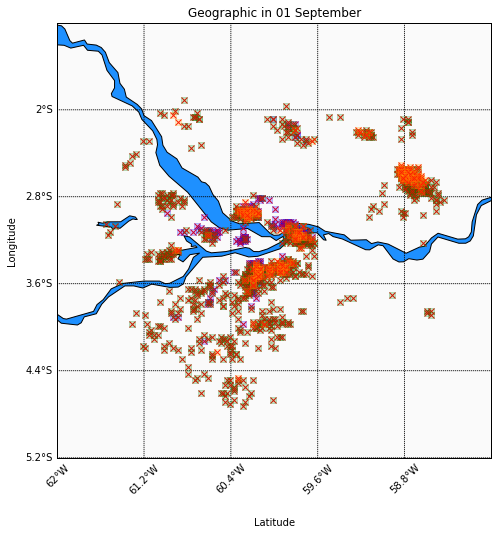

In [59]:
my_coords = [-3.2, -60.00000000]
zoom_scale = 2

bbox = [my_coords[0]-zoom_scale,my_coords[0]+zoom_scale,\
        my_coords[1]-zoom_scale,my_coords[1]+zoom_scale]

plt.figure(figsize=(20, 8))
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

m.drawcoastlines()
m.fillcontinents(color='#FAFAFA',lake_color='dodgerblue')

m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
m.drawmapboundary(fill_color='dodgerblue')

x,y = m(my_coords[1],my_coords[0])
plt.title("Geographic in 01 September")
plt.ylabel('Longitude', labelpad=40)
plt.xlabel('Latitude', labelpad=60)

for line in lights1[['lon', 'lat']].values:
    coords = (line[0], line[1])
    x,y = m(coords[0], coords[1])
    m.plot(x,y,marker='x',color='r')
    m.plot(x, y, marker='s', color='b', alpha=0.2)
    
for line in lights2[['lon', 'lat']].values:
    coords = (line[0], line[1])
    x,y = m(coords[0], coords[1])
    m.plot(x,y,marker='x',color='r')
    m.plot(x, y, marker='s', color='g', alpha=0.2)
    
for line in lights3[['lon', 'lat']].values:
    coords = (line[0], line[1])
    x,y = m(coords[0], coords[1])
    m.plot(x,y,marker='x',color='r')
    m.plot(x, y, marker='s', color='orange', alpha=0.2)
    

plt.show()

In [221]:
# print(lights1.groupby(['day']).agg({'yyyyy_xx1': 'sum'}))
print(lights1.groupby(['day']).agg({'yyyyy_xx2': 'sum'}).values.ravel())

[128.   1.  16.   1. 454. 126.   6.]


/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/adriano/.l

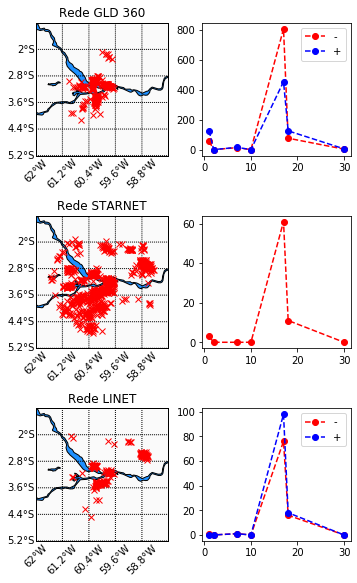

<Figure size 720x576 with 0 Axes>

In [245]:
fig, ax = plt.subplots(3, 2, figsize=(5, 8))

my_coords = [-3.2, -60.00000000]
zoom_scale = 2

bbox = [my_coords[0]-zoom_scale,my_coords[0]+zoom_scale,\
        my_coords[1]-zoom_scale,my_coords[1]+zoom_scale]

ax[0, 0].set_title("Rede GLD 360")
map = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i', ax=ax[0, 0])
map.drawcoastlines()
map.fillcontinents(color='#FAFAFA',lake_color='dodgerblue')
map.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
map.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
map.drawmapboundary(fill_color='dodgerblue')
group = lights1.groupby(['day']).agg({'yyyyy_xx1': 'sum'})
x = group.index.to_list()
x = [int(i) for i in x]
y = group.values.ravel()
y = [int(i) for i in y]


ax[0, 1].plot(x, y, 'ro--', label='-')
group = lights1.groupby(['day']).agg({'yyyyy_xx2': 'sum'})
x = group.index.to_list()
x = [int(i) for i in x]
y = group.values.ravel()
y = [int(i) for i in y]
ax[0, 1].plot(x, y, 'bo--', label='+')
ax[0, 1].legend()
for line in lights1[['lon', 'lat']].values:
    coords = (line[0], line[1])
    x,y = map(coords[0], coords[1])
    map.plot(x,y,marker='x',color='r')
    
    
ax[1, 0].set_title("Rede STARNET")
map = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i', ax=ax[1, 0])
map.drawcoastlines()
map.fillcontinents(color='#FAFAFA',lake_color='dodgerblue')
map.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
map.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
map.drawmapboundary(fill_color='dodgerblue')
for line in lights2[['lon', 'lat']].values:
    coords = (line[0], line[1])
    x,y = map(coords[0], coords[1])
    map.plot(x,y,marker='x',color='r')

group = lights1.groupby(['day']).agg({'yyyyyyy_xx3': 'sum'})
x = group.index.to_list()
x = [int(i) for i in x]
y = group.values.ravel()
y = [int(i) for i in y]
ax[1, 1].plot(x, y, 'ro--')


ax[2, 0].set_title("Rede LINET")
map = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i', ax=ax[2, 0])
map.drawcoastlines()
map.fillcontinents(color='#FAFAFA',lake_color='dodgerblue')
map.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
map.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
map.drawmapboundary(fill_color='dodgerblue')

for line in lights3[['lon', 'lat']].values:
    coords = (line[0], line[1])
    x,y = map(coords[0], coords[1])
    map.plot(x,y,marker='x',color='r')

group = lights1.groupby(['day']).agg({'yyy_xx4': 'sum'})
x = group.index.to_list()
x = [int(i) for i in x]
y = group.values.ravel()
y = [int(i) for i in y]
ax[2, 1].plot(x, y, 'ro--', label='-')

group = lights1.groupby(['day']).agg({'yyy_xx5': 'sum'})
x = group.index.to_list()
x = [int(i) for i in x]
y = group.values.ravel()
y = [int(i) for i in y]
ax[2, 1].plot(x, y, 'bo--', label='+')
ax[2, 1].legend()

plt.tight_layout(pad=0.4, w_pad=0, h_pad=1.0)
plt.figure(figsize=(10, 8))
plt.show()

In [ ]:
a =

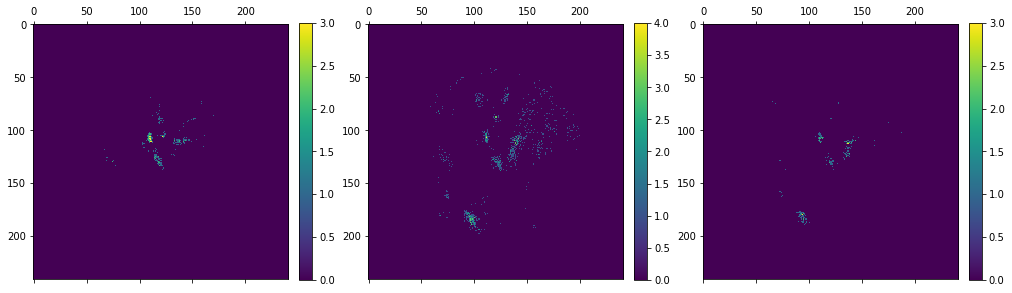

In [150]:
fig, ax = plt.subplots(1, 3, figsize=(17, 8))

background = np.zeros(241*241)
background = np.reshape(background, (241, 241))
for x, y in lights1[['ind_x', 'ind_y']].values:
    background[int(x)][int(y)] += 1    
im = ax[0].matshow(background)
fig.colorbar(im, ax=ax[0], fraction=0.046, pad=0.04)

background = np.zeros(241*241)
background = np.reshape(background, (241, 241))
for x, y in lights2[['ind_x', 'ind_y']].values:
    background[int(x)][int(y)] += 1    
im = ax[1].matshow(background)
fig.colorbar(im, ax=ax[1], fraction=0.046, pad=0.04)

background = np.zeros(241*241)
background = np.reshape(background, (241, 241))
for x, y in lights3[['ind_x', 'ind_y']].values:
    background[int(x)][int(y)] += 1    
im = ax[2].matshow(background)
fig.colorbar(im, ax=ax[2], fraction=0.046, pad=0.04)
plt.show()